In [1]:
import sqlite3
import matplotlib.pyplot as plt
import numpy as np

### load database file giving the full address to it's location and create a cursor to the database

In [2]:
connection = sqlite3.connect("hipparcos.db")
cursor = connection.cursor()

### Write down SQL command....here we are collecting "B-V" color and V absolute magnitude data for those stars which have error_distance (e_Dist)  nonzero and less than 10, and non-zero "B-V" color.

In [3]:
sql_command = '\
    SELECT DISTINCT data.HIP, "B-V", VAbsMag, e_Dist \
    FROM data \
    JOIN photometry ON data.HIP = photometry.HIP \
    WHERE e_Dist > 0  AND e_Dist < 10 \
    AND "B-V" != 0 \
    ORDER BY "B-V" ; \
    '
     

### run SQL command and fetch the result to use later

In [4]:
cursor.execute(sql_command)
results = cursor.fetchall()

### create separate list for each column from the resulting database

In [5]:
HIPs = [item[0] for item in results]
B_V_color = [item[1] for item in results]
VAbsMag = [item[2] for item in results]

### plot your data

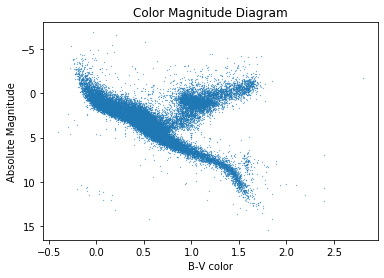

In [6]:
fig, ax = plt.subplots(1,1)
ax.plot(B_V_color, VAbsMag, '.', markersize=0.5)
ax.invert_yaxis()
ax.set_xlabel('B-V color')
ax.set_ylabel('Absolute Magnitude')
ax.set_title('Color Magnitude Diagram')
fig.savefig('color_magnitude_diagram.pdf', dpi=200)

### Another SQL command to collect data only for white dwarfs 

In [7]:
sql_command_2 = '\
    SELECT DISTINCT data.HIP, "B-V", VAbsMag, e_Dist \
    FROM data \
    JOIN photometry ON data.HIP = photometry.HIP \
    WHERE e_Dist > 0  AND e_Dist < 10 \
    AND "B-V" != 0 AND "B-V" < 0.7 \
    AND VAbsMag > 10 \
    ORDER BY "B-V" ; \
    '

In [8]:
cursor.execute(sql_command_2)
results_WD = cursor.fetchall()

In [9]:
HIPs_WD = [item[0] for item in results_WD]
B_V_color_WD = [item[1] for item in results_WD]
VAbsMag_WD = [item[2] for item in results_WD]

In [10]:
B_V_color_WD_new = B_V_color_WD + [0]*(len(B_V_color)-len(B_V_color_WD) )
VAbsMag_WD_new = VAbsMag_WD + [0]*(len(VAbsMag)-len(VAbsMag_WD))

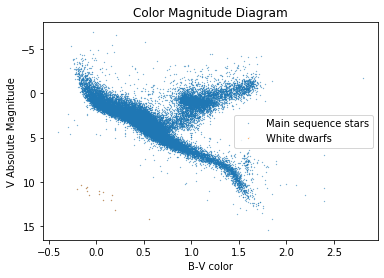

In [16]:
fig, ax = plt.subplots(1,1)

ax.plot(B_V_color, VAbsMag, '.', markersize=0.5, label="Main sequence stars")
ax.plot(B_V_color_WD, VAbsMag_WD, marker='*', color='orange', markersize=0.5, label="White dwarfs")
ax.legend()
ax.invert_yaxis()
ax.set_xlabel('B-V color')
ax.set_ylabel('V Absolute Magnitude')
ax.set_title('Color Magnitude Diagram')
fig.savefig('color_magnitude_diagram_with_WD.pdf', dpi=200)